In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

train = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\train.csv')
test = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\test.csv')

In [14]:
train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [15]:
train.isnull().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42100.0,21049.500000,12153.367503,0.0,10524.75,21049.50,31574.25,42099.0
no_of_adults,42100.0,1.920713,0.524950,0.0,2.00,2.00,2.00,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.00,1.00,2.00,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.00,0.00,0.00,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.00,0.00,1.00,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.00,93.00,155.00,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.00,2018.00,2018.00,2018.0


In [17]:
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(train)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
id,42100,int64,0,0.000000,100.000000,0,possible ID column: drop
avg_price_per_room,2286,float64,0,0.000000,5.429929,0,
lead_time,338,int64,0,0.000000,0.802850,0,
no_of_previous_bookings_not_canceled,42,int64,0,0.000000,0.099762,0,
arrival_date,31,int64,0,0.000000,0.073634,0,
no_of_week_nights,18,int64,0,0.000000,0.042755,0,
arrival_month,12,int64,0,0.000000,0.028504,0,
no_of_previous_cancellations,10,int64,0,0.000000,0.023753,0,
no_of_weekend_nights,8,int64,0,0.000000,0.019002,0,
room_type_reserved,7,int64,0,0.000000,0.016627,0,


In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot = True)
plt.show()

Selecting important columns with corr

In [19]:
imortant_cols = list(train.corr()['booking_status'][(train.corr()['booking_status']>0.1)|(train.corr()['booking_status']<-0.1)].index)
imortant_cols

['lead_time',
 'arrival_year',
 'market_segment_type',
 'repeated_guest',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [20]:
numcols = train[train.columns.intersection(imortant_cols)]
sns.heatmap(numcols.corr(), annot = True)
plt.show()

In [21]:
train.dtypes

id                                        int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [11]:
from pandas_profiling import ProfileReport
pr = ProfileReport(numcols)
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
numcols.drop_duplicates()

,lead_time,arrival_year,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status
0,9,2018,1,1,67.50,0,0
1,117,2018,0,0,72.25,0,0
2,315,2018,0,0,52.00,0,0
3,32,2018,1,0,56.00,0,0
4,258,2018,0,0,100.00,0,1
...,...,...,...,...,...,...,...
42086,90,2018,1,0,135.90,0,0
42087,14,2018,1,0,170.00,0,0
42094,101,2018,0,0,122.40,1,0
42095,160,2018,1,0,140.00,2,1


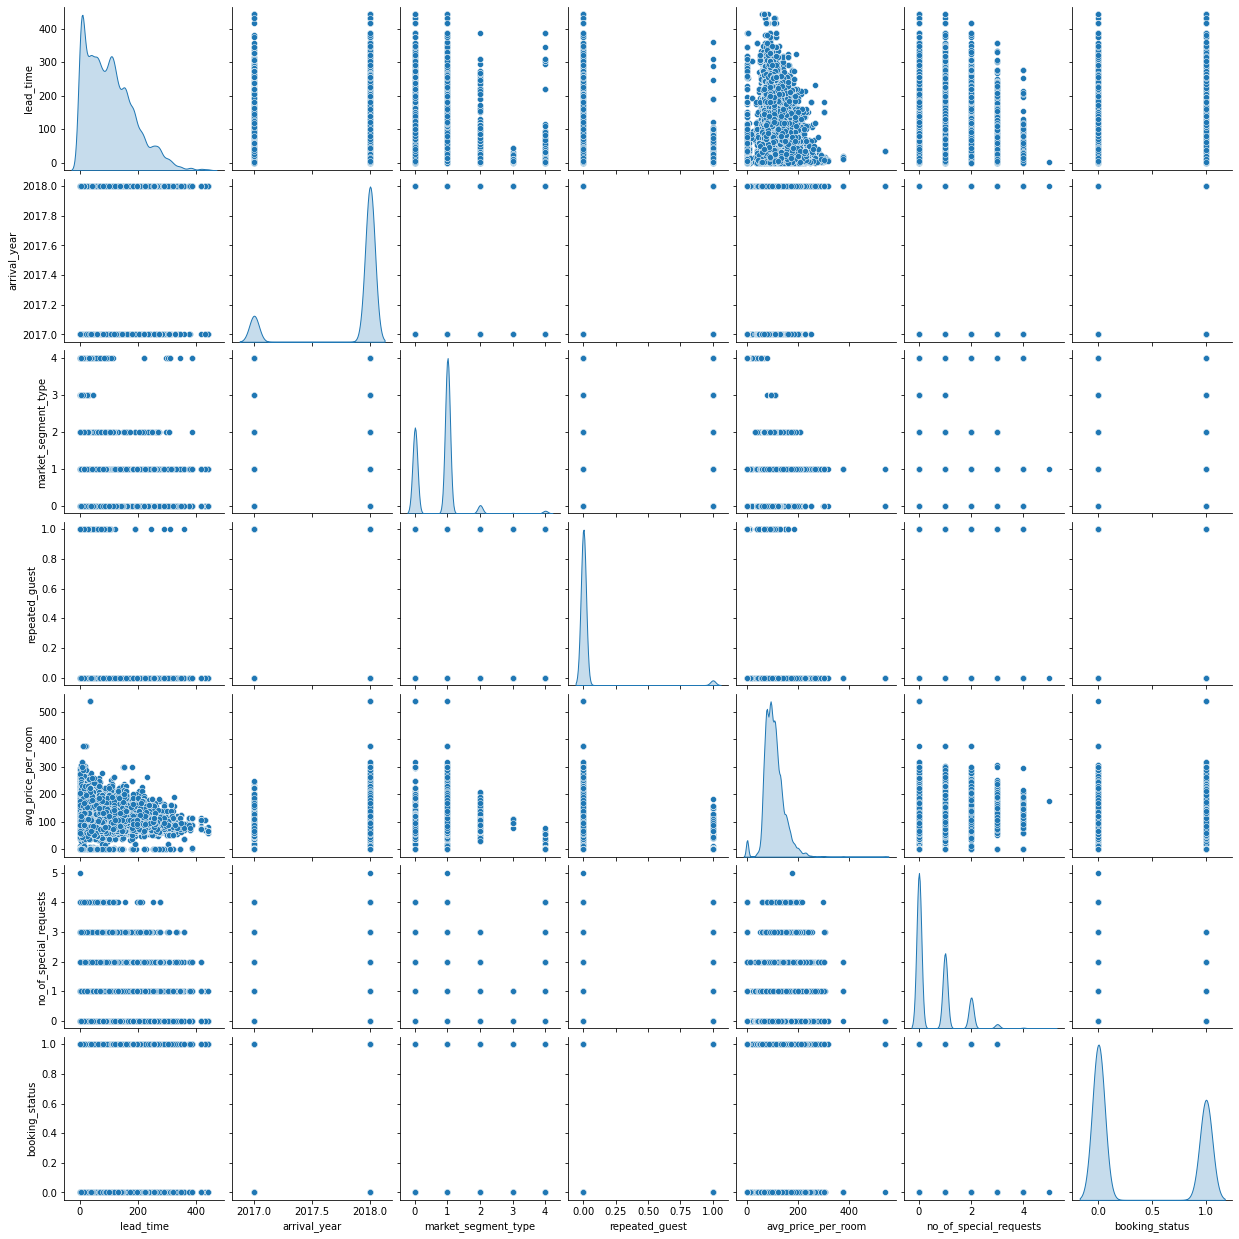

In [10]:
sns.pairplot(numcols, diag_kind = 'kde')

In [10]:
train.drop(['id'], axis = 1, inplace = True)

In [11]:
X = train.drop('booking_status', axis=1)
y = train['booking_status']

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
df = pd.DataFrame({
    'y_pred' : y_pred,
    'y_test' : y_test
})
df.head(20)

,y_pred,y_test
25932,0,0
33386,1,0
21858,0,0
15491,0,0
15852,1,0
526,0,0
32662,0,0
33311,1,1
33507,0,0
41450,0,0


In [16]:
from sklearn.metrics import roc_curve

In [17]:
fpr, tpr, treesholders = roc_curve(y_test, y_pred)

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

After training the model get started for scores

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print('Accuracy =', accuracy_score(y_test, y_pred).round(2))
print('Precision =', precision_score(y_test, y_pred).round(2))
print('Recall =', recall_score(y_test, y_pred).round(2))

Accuracy = 0.76
Precision = 0.7
Recall = 0.63


The grades here are relatively for the little ones, I'll try the stack

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

plt.title('Confusion matrix')
plt.show()

In [21]:
confusion_matrix(y_test, y_pred)

array([[4332,  869],
       [1176, 2043]], dtype=int64)

I want to trying all the ensemble

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=1))
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_train, y_train)

scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
print('Accuraccy pre Stack =', scores)

Accuraccy pre Stack = [0.78915491 0.78814224 0.79313048]


In [24]:
y_pred = clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred).round(2))
print('Precision =', precision_score(y_test, y_pred).round(2))
print('Recall =', recall_score(y_test, y_pred).round(2))

Accuracy = 0.79
Precision = 0.73
Recall = 0.73


The accuracy here is already higher

Next I'll to try Bagging

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

In [29]:
y_pred = clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred).round(2))
print('Precision =', precision_score(y_test, y_pred).round(2))
print('Recall =', recall_score(y_test, y_pred).round(2))

Accuracy = 0.79
Precision = 0.75
Recall = 0.69


Accuracy remains the same but there are changes in precision and recall values increased and decreased respectively

Now i'll work with boosting

In [30]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
from catboost import CatBoostClassifier
from sklearn.metrics import r2_score, mean_squared_log_error
model = CatBoostClassifier(iterations=5000, depth=5, learning_rate=0.05)

model.fit(X_train, y_train)

0:	learn: 0.6681619	total: 15.4ms	remaining: 1m 16s
1:	learn: 0.6456877	total: 28.7ms	remaining: 1m 11s
2:	learn: 0.6257061	total: 42.6ms	remaining: 1m 10s
3:	learn: 0.6083602	total: 55.2ms	remaining: 1m 8s
4:	learn: 0.5928839	total: 70ms	remaining: 1m 9s
5:	learn: 0.5788065	total: 83.6ms	remaining: 1m 9s
6:	learn: 0.5665929	total: 96.8ms	remaining: 1m 9s
7:	learn: 0.5558738	total: 111ms	remaining: 1m 8s
8:	learn: 0.5464576	total: 125ms	remaining: 1m 9s
9:	learn: 0.5377154	total: 137ms	remaining: 1m 8s
10:	learn: 0.5310575	total: 151ms	remaining: 1m 8s
11:	learn: 0.5240463	total: 165ms	remaining: 1m 8s
12:	learn: 0.5176189	total: 179ms	remaining: 1m 8s
13:	learn: 0.5119323	total: 193ms	remaining: 1m 8s
14:	learn: 0.5067001	total: 207ms	remaining: 1m 8s
15:	learn: 0.5022110	total: 222ms	remaining: 1m 9s
16:	learn: 0.4977543	total: 236ms	remaining: 1m 9s
17:	learn: 0.4937895	total: 250ms	remaining: 1m 9s
18:	learn: 0.4901562	total: 265ms	remaining: 1m 9s
19:	learn: 0.4871314	total: 279ms

In [56]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print('classification_report:')
print(classification_report(y_test, y_pred))

classification_report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5201
           1       0.76      0.76      0.76      3219

    accuracy                           0.82      8420
   macro avg       0.81      0.81      0.81      8420
weighted avg       0.82      0.82      0.82      8420



The metrics here are already much better

In [66]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred).round(2))

Accuracy = 0.8
